In [1]:
!pip -q install git+https://github.com/ultralytics/ultralytics.git roboflow

  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git 'C:\Users\johan\AppData\Local\Temp\pip-req-build-94zgz9b5' did not run successfully.
  │ exit code: 128
  ╰─> [1 lines of output]
      fatal: unable to access 'https://github.com/ultralytics/ultralytics.git/': The requested URL returned error: 503
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git 'C:\Users\johan\AppData\Local\Temp\pip-req-build-94zgz9b5' did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [2]:
from ultralytics import YOLO
import pandas as pd
from IPython.display import Image, display
import numpy as np
import cv2
import os

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="FrlhdOCmNQfOtd5DVpu0")
project = rf.workspace("pfe-zjo9z").project("apple-disease-detection-migl6")
version = project.version(7)
dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...


In [4]:
model = YOLO("yolov8n.pt")

In [5]:
model.train(
    data="Apple-Disease-Detection-7/data.yaml",
    epochs=30,
    project="runs/detect",  
    name="train1"          
)

Ultralytics 8.3.50  Python-3.11.0 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=Apple-Disease-Detection-7/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/detect, name=train1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

train: Scanning D:\Sem7\CV\UAS CV\Apple-Disease-Detection-7\train\labels.cache... 1122 images, 3 backgrounds, 0 corrupt: 100%|██████████| 1122/1122 [00:00<?, ?it/s]
val: Scanning D:\Sem7\CV\UAS CV\Apple-Disease-Detection-7\valid\labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


Plotting labels to runs\detect\train1\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train1
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.12G     0.9583      2.479      1.452          8        640: 100%|██████████| 71/71 [00:14<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

                   all         60         72       0.51      0.614      0.661       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.11G     0.9668      1.696       1.42          6        640: 100%|██████████| 71/71 [00:09<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all         60         72      0.543      0.663      0.655      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.11G     0.9881      1.473       1.44          6        640: 100%|██████████| 71/71 [00:09<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         60         72      0.576      0.794       0.79      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.1G     0.9713       1.34      1.404          8        640: 100%|██████████| 71/71 [00:09<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         60         72      0.625      0.746      0.734      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.09G     0.9846      1.259      1.408          5        640: 100%|██████████| 71/71 [00:10<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]


                   all         60         72      0.666      0.652       0.69      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.11G     0.9048      1.131       1.36          4        640: 100%|██████████| 71/71 [00:09<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]

                   all         60         72      0.731      0.492      0.604      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.11G      0.906      1.056       1.35         10        640: 100%|██████████| 71/71 [00:09<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]

                   all         60         72      0.858      0.765      0.872      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       2.1G     0.8715     0.9964       1.33          5        640: 100%|██████████| 71/71 [00:09<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         60         72      0.796      0.827      0.891      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.09G     0.9022      0.999      1.352          4        640: 100%|██████████| 71/71 [00:09<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]

                   all         60         72      0.698      0.842      0.888      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.11G      0.888     0.9582      1.329          8        640: 100%|██████████| 71/71 [00:09<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]


                   all         60         72      0.775       0.78      0.859       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       2.1G     0.8695     0.9148      1.326          6        640: 100%|██████████| 71/71 [00:09<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         60         72      0.661      0.729      0.853      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.12G     0.8724     0.8897      1.318          6        640: 100%|██████████| 71/71 [00:09<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]

                   all         60         72      0.769      0.814      0.884      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.09G     0.8661     0.8623      1.319          8        640: 100%|██████████| 71/71 [00:09<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]


                   all         60         72      0.744       0.67      0.823      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       2.1G     0.8507      0.838      1.305          5        640: 100%|██████████| 71/71 [00:09<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         60         72      0.904      0.834      0.912      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       2.1G     0.8423     0.8306      1.303          6        640: 100%|██████████| 71/71 [00:09<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.70it/s]

                   all         60         72       0.82      0.875      0.908      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       2.1G      0.854     0.8108      1.304          6        640: 100%|██████████| 71/71 [00:09<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]

                   all         60         72      0.886      0.708      0.859      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.11G     0.8377     0.7841      1.297          6        640: 100%|██████████| 71/71 [00:09<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         60         72      0.871      0.795      0.911      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.1G     0.8258     0.7781      1.287          6        640: 100%|██████████| 71/71 [00:09<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]

                   all         60         72      0.821       0.84      0.887      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       2.1G     0.8003     0.7458      1.271          7        640: 100%|██████████| 71/71 [00:09<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]

                   all         60         72      0.915      0.777        0.9      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       2.1G     0.7895     0.7302      1.259          3        640: 100%|██████████| 71/71 [00:10<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]

                   all         60         72       0.81      0.837      0.907      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.09G     0.8108     0.7564      1.287          6        640: 100%|██████████| 71/71 [00:10<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         60         72      0.774      0.795      0.875      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       2.1G     0.7751     0.6984      1.263          3        640: 100%|██████████| 71/71 [00:10<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         60         72      0.839      0.813      0.886      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       2.1G     0.7892     0.6704      1.259          5        640: 100%|██████████| 71/71 [00:09<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]


                   all         60         72       0.77      0.891       0.89      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.12G     0.7854     0.6833      1.262          4        640: 100%|██████████| 71/71 [00:09<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]

                   all         60         72      0.897      0.838      0.935      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.09G     0.7884     0.6885      1.259          3        640: 100%|██████████| 71/71 [00:09<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]

                   all         60         72      0.882       0.84      0.909      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       2.1G      0.773      0.683      1.252          3        640: 100%|██████████| 71/71 [00:09<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]

                   all         60         72      0.856      0.853      0.918      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.1G      0.767     0.6382      1.245          6        640: 100%|██████████| 71/71 [00:09<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]

                   all         60         72      0.854      0.851      0.915      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       2.1G     0.7623     0.6383      1.236          8        640: 100%|██████████| 71/71 [00:09<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         60         72      0.913      0.869      0.952      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.09G     0.7627      0.644      1.253          6        640: 100%|██████████| 71/71 [00:09<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]

                   all         60         72      0.835      0.898      0.931      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.12G     0.7309     0.6491      1.225          4        640: 100%|██████████| 71/71 [00:09<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]

                   all         60         72      0.871      0.794      0.912      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.12G     0.7629     0.6461      1.233          8        640: 100%|██████████| 71/71 [00:09<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         60         72      0.762      0.866      0.907      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       2.1G      0.738     0.5983      1.228          4        640: 100%|██████████| 71/71 [00:09<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]


                   all         60         72      0.772      0.861      0.924      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.09G     0.7591     0.6129      1.234          8        640: 100%|██████████| 71/71 [00:09<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]

                   all         60         72      0.798      0.868      0.933      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.11G     0.7327     0.6028      1.214          8        640: 100%|██████████| 71/71 [00:09<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]

                   all         60         72      0.861      0.878      0.917      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       2.1G     0.7208     0.5952      1.213          5        640: 100%|██████████| 71/71 [00:09<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         60         72      0.849      0.869       0.93       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       2.1G     0.7392     0.6089      1.221          8        640: 100%|██████████| 71/71 [00:09<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.77it/s]

                   all         60         72      0.899      0.806      0.921      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.09G     0.7335     0.5738      1.211          5        640: 100%|██████████| 71/71 [00:09<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         60         72      0.834      0.918      0.915      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       2.1G     0.7212     0.5803      1.211          5        640: 100%|██████████| 71/71 [00:09<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]

                   all         60         72      0.867      0.902      0.947      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       2.1G     0.7234     0.5762      1.202          6        640: 100%|██████████| 71/71 [00:09<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         60         72      0.841      0.855      0.913      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       2.1G     0.7202     0.5762      1.219          4        640: 100%|██████████| 71/71 [00:09<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]

                   all         60         72      0.887      0.847      0.912      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.09G     0.7191     0.6032      1.204          3        640: 100%|██████████| 71/71 [00:09<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]


                   all         60         72      0.814      0.815      0.901      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       2.1G     0.7067     0.5676      1.197          6        640: 100%|██████████| 71/71 [00:09<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]


                   all         60         72       0.89      0.907      0.943       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       2.1G     0.7077     0.5651      1.196          4        640: 100%|██████████| 71/71 [00:09<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         60         72      0.768      0.883      0.911      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.12G     0.6972     0.5328      1.184          7        640: 100%|██████████| 71/71 [00:09<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         60         72      0.882      0.748      0.892      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.09G     0.6928     0.5347      1.193          6        640: 100%|██████████| 71/71 [00:09<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         60         72       0.87       0.88      0.918      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.12G     0.6609     0.5158      1.172          7        640: 100%|██████████| 71/71 [00:09<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]

                   all         60         72      0.834      0.878      0.909      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       2.1G     0.6772     0.5156      1.188          7        640: 100%|██████████| 71/71 [00:09<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]

                   all         60         72      0.846      0.846      0.925      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       2.1G     0.6748     0.5395      1.181          5        640: 100%|██████████| 71/71 [00:09<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         60         72      0.833      0.838       0.92      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.09G     0.6548     0.5172      1.165          6        640: 100%|██████████| 71/71 [00:09<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]

                   all         60         72      0.815      0.864       0.94      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.11G     0.6775     0.5227      1.184          9        640: 100%|██████████| 71/71 [00:09<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]


                   all         60         72      0.808      0.911      0.932      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       2.1G     0.6694     0.5246       1.18          4        640: 100%|██████████| 71/71 [00:09<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         60         72      0.876      0.832       0.92      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       2.1G     0.6595     0.5128      1.169          2        640: 100%|██████████| 71/71 [00:09<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.70it/s]

                   all         60         72      0.915      0.816      0.936      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.09G     0.6461     0.4924      1.164          8        640: 100%|██████████| 71/71 [00:09<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         60         72       0.88      0.901      0.945      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       2.1G     0.6534     0.5697      1.174          2        640: 100%|██████████| 71/71 [00:09<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]

                   all         60         72      0.901      0.811      0.919      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.12G     0.6463     0.4966      1.157          4        640: 100%|██████████| 71/71 [00:09<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]

                   all         60         72      0.793      0.897      0.898      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       2.1G      0.639     0.4788      1.158          4        640: 100%|██████████| 71/71 [00:09<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         60         72      0.929      0.819      0.953      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.09G      0.644     0.4991      1.159          6        640: 100%|██████████| 71/71 [00:09<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         60         72      0.891       0.83      0.898      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       2.1G     0.6524     0.4992      1.169          3        640: 100%|██████████| 71/71 [00:09<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all         60         72      0.832      0.948       0.94      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       2.1G     0.6496     0.4877      1.171          2        640: 100%|██████████| 71/71 [00:09<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]

                   all         60         72       0.84      0.859      0.924      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       2.1G      0.641     0.4931      1.157          3        640: 100%|██████████| 71/71 [00:09<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]

                   all         60         72      0.822      0.907      0.933      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.09G     0.6227     0.4781      1.144          5        640: 100%|██████████| 71/71 [00:09<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         60         72      0.856      0.857      0.926      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       2.1G      0.622     0.4674       1.14          4        640: 100%|██████████| 71/71 [00:09<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]

                   all         60         72      0.794      0.863       0.93      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       2.1G     0.6238     0.4923      1.142          3        640: 100%|██████████| 71/71 [00:09<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]

                   all         60         72      0.865      0.846      0.914       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       2.1G     0.5987     0.4474      1.127          5        640: 100%|██████████| 71/71 [00:09<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.77it/s]

                   all         60         72      0.869      0.882      0.915      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.09G     0.6261     0.4511      1.135          8        640: 100%|██████████| 71/71 [00:09<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]

                   all         60         72      0.824      0.859      0.915       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       2.1G     0.6003     0.4296      1.134          5        640: 100%|██████████| 71/71 [00:09<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         60         72      0.886      0.871      0.939      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.12G     0.6012      0.456      1.128          4        640: 100%|██████████| 71/71 [00:09<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]

                   all         60         72      0.859      0.879      0.907       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       2.1G     0.5922     0.4424      1.117          5        640: 100%|██████████| 71/71 [00:09<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]

                   all         60         72      0.885      0.847      0.894      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.09G     0.6046     0.4507      1.132          7        640: 100%|██████████| 71/71 [00:09<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]

                   all         60         72      0.855       0.87      0.931      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.12G     0.5879     0.4443      1.124          4        640: 100%|██████████| 71/71 [00:09<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]

                   all         60         72      0.886      0.864      0.944      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       2.1G     0.5917     0.4449      1.127          6        640: 100%|██████████| 71/71 [00:09<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         60         72      0.903       0.86      0.947      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       2.1G     0.5663     0.4298       1.11          4        640: 100%|██████████| 71/71 [00:09<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         60         72      0.937      0.878      0.971      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.09G     0.5854     0.4289      1.117          8        640: 100%|██████████| 71/71 [00:09<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]

                   all         60         72      0.892      0.893      0.954       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.11G     0.5782     0.4166      1.113          6        640: 100%|██████████| 71/71 [00:09<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         60         72       0.83       0.91      0.945      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.11G     0.5749     0.4197      1.112          9        640: 100%|██████████| 71/71 [00:09<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         60         72      0.818      0.905      0.941      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       2.1G      0.566     0.4135      1.106          7        640: 100%|██████████| 71/71 [00:09<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]

                   all         60         72      0.844      0.901      0.945      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.09G     0.5629     0.4219      1.097          5        640: 100%|██████████| 71/71 [00:09<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         60         72      0.885      0.859      0.943      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       2.1G     0.5679     0.4121      1.109          3        640: 100%|██████████| 71/71 [00:09<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]

                   all         60         72       0.89      0.917      0.963      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       2.1G      0.546     0.3948      1.099          4        640: 100%|██████████| 71/71 [00:09<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         60         72      0.901      0.906      0.954      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       2.1G     0.5559     0.4092      1.095          8        640: 100%|██████████| 71/71 [00:09<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]

                   all         60         72       0.87      0.897      0.944      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.09G     0.5419     0.4034      1.097          7        640: 100%|██████████| 71/71 [00:09<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]

                   all         60         72      0.884       0.87      0.955      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       2.1G     0.5393     0.3895      1.096          5        640: 100%|██████████| 71/71 [00:09<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]

                   all         60         72      0.901      0.868      0.958      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.1G     0.5542     0.4068      1.102          5        640: 100%|██████████| 71/71 [00:09<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]

                   all         60         72      0.873      0.859      0.936      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       2.1G     0.5329     0.3922      1.095          4        640: 100%|██████████| 71/71 [00:09<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         60         72      0.849      0.899      0.949      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.09G     0.5274     0.3936      1.082          4        640: 100%|██████████| 71/71 [00:09<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]

                   all         60         72      0.863      0.914      0.957      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       2.1G      0.519     0.4042      1.079          2        640: 100%|██████████| 71/71 [00:09<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]

                   all         60         72        0.9      0.866      0.949       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       2.1G     0.5368     0.3882      1.087          7        640: 100%|██████████| 71/71 [00:09<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]

                   all         60         72      0.889      0.895      0.958       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       2.1G     0.5277     0.3882      1.082          5        640: 100%|██████████| 71/71 [00:09<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]

                   all         60         72      0.901      0.892      0.956       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.09G     0.5281     0.3805       1.08          7        640: 100%|██████████| 71/71 [00:09<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]

                   all         60         72      0.899      0.908      0.955      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       2.1G     0.5265      0.385       1.08          6        640: 100%|██████████| 71/71 [00:09<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]

                   all         60         72      0.867      0.934      0.961       0.76


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       2.1G     0.4119     0.3084      1.073          2        640: 100%|██████████| 71/71 [00:09<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]

                   all         60         72      0.882      0.904      0.948      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       2.1G     0.3907     0.2628      1.059          2        640: 100%|██████████| 71/71 [00:09<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]

                   all         60         72      0.904      0.905      0.945       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.09G     0.3942     0.2783      1.063          3        640: 100%|██████████| 71/71 [00:09<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]

                   all         60         72      0.879      0.906      0.946      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.1G     0.3791     0.2432      1.045          2        640: 100%|██████████| 71/71 [00:09<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.70it/s]

                   all         60         72      0.886      0.895      0.961      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       2.1G     0.3817     0.2496      1.049          2        640: 100%|██████████| 71/71 [00:09<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]

                   all         60         72      0.899      0.905      0.956      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       2.1G     0.3636      0.243      1.033          2        640: 100%|██████████| 71/71 [00:09<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]

                   all         60         72      0.919      0.885      0.962      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.09G     0.3635     0.2426      1.033          2        640: 100%|██████████| 71/71 [00:09<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         60         72      0.896      0.927      0.959      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       2.1G      0.364     0.2254       1.03          2        640: 100%|██████████| 71/71 [00:09<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         60         72      0.929      0.886       0.96      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       2.1G     0.3603      0.232      1.021          2        640: 100%|██████████| 71/71 [00:09<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]


                   all         60         72      0.878       0.93       0.96      0.758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       2.1G     0.3518     0.2311      1.017          2        640: 100%|██████████| 71/71 [00:09<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         60         72      0.879       0.93      0.957      0.752



100 epochs completed in 0.303 hours.
Optimizer stripped from runs\detect\train1\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train1\weights\best.pt, 6.3MB

Validating runs\detect\train1\weights\best.pt...
Ultralytics 8.3.50  Python-3.11.0 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]


                   all         60         72      0.937      0.878      0.971      0.771
                BLOTCH         16         17      0.831      0.882      0.953      0.859
               HEALTHY         11         20      0.992       0.85      0.982      0.705
                   ROT         16         16      0.932      0.938      0.979      0.777
                  SCAB         17         19      0.995      0.842      0.971      0.743
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\train1


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001F88EFA9090>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

In [6]:
results = model.val(
    project="runs/detect",  
    name="train2" 
)

Ultralytics 8.3.50  Python-3.11.0 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\Sem7\CV\UAS CV\Apple-Disease-Detection-7\valid\labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.47s/it]


                   all         60         72      0.936      0.878      0.971      0.771
                BLOTCH         16         17       0.83      0.882      0.953      0.859
               HEALTHY         11         20      0.992       0.85      0.982      0.705
                   ROT         16         16      0.931      0.938      0.979      0.776
                  SCAB         17         19      0.993      0.842      0.971      0.742
Speed: 0.4ms preprocess, 9.2ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\train2


In [7]:
df_results = pd.read_csv('runs/detect/train1/results.csv')
df_results

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,24.8100,0.95831,2.47902,1.45150,0.51002,0.61409,0.66067,0.46030,1.05133,2.07668,1.95964,0.000411,0.000411,0.000411
1,2,36.2199,0.96681,1.69585,1.41955,0.54296,0.66314,0.65503,0.42633,1.25624,2.10884,2.07991,0.000819,0.000819,0.000819
2,3,46.8447,0.98807,1.47255,1.44005,0.57623,0.79365,0.79023,0.52364,1.10909,1.57393,1.79238,0.001220,0.001220,0.001220
3,4,57.7652,0.97132,1.34041,1.40421,0.62517,0.74601,0.73409,0.52080,1.06050,1.56475,1.76520,0.001213,0.001213,0.001213
4,5,69.1923,0.98460,1.25908,1.40839,0.66621,0.65229,0.69033,0.47386,1.13307,1.80350,1.82545,0.001200,0.001200,0.001200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1049.6000,0.36356,0.24303,1.03345,0.91886,0.88549,0.96167,0.75314,0.88240,0.54440,1.65022,0.000074,0.000074,0.000074
96,97,1059.8400,0.36350,0.24262,1.03281,0.89639,0.92742,0.95939,0.74673,0.90165,0.53946,1.67661,0.000062,0.000062,0.000062
97,98,1070.0900,0.36395,0.22538,1.03017,0.92919,0.88628,0.95961,0.74807,0.89754,0.53251,1.68779,0.000050,0.000050,0.000050
98,99,1080.5600,0.36031,0.23202,1.02125,0.87837,0.93010,0.96027,0.75845,0.88899,0.55789,1.67978,0.000037,0.000037,0.000037


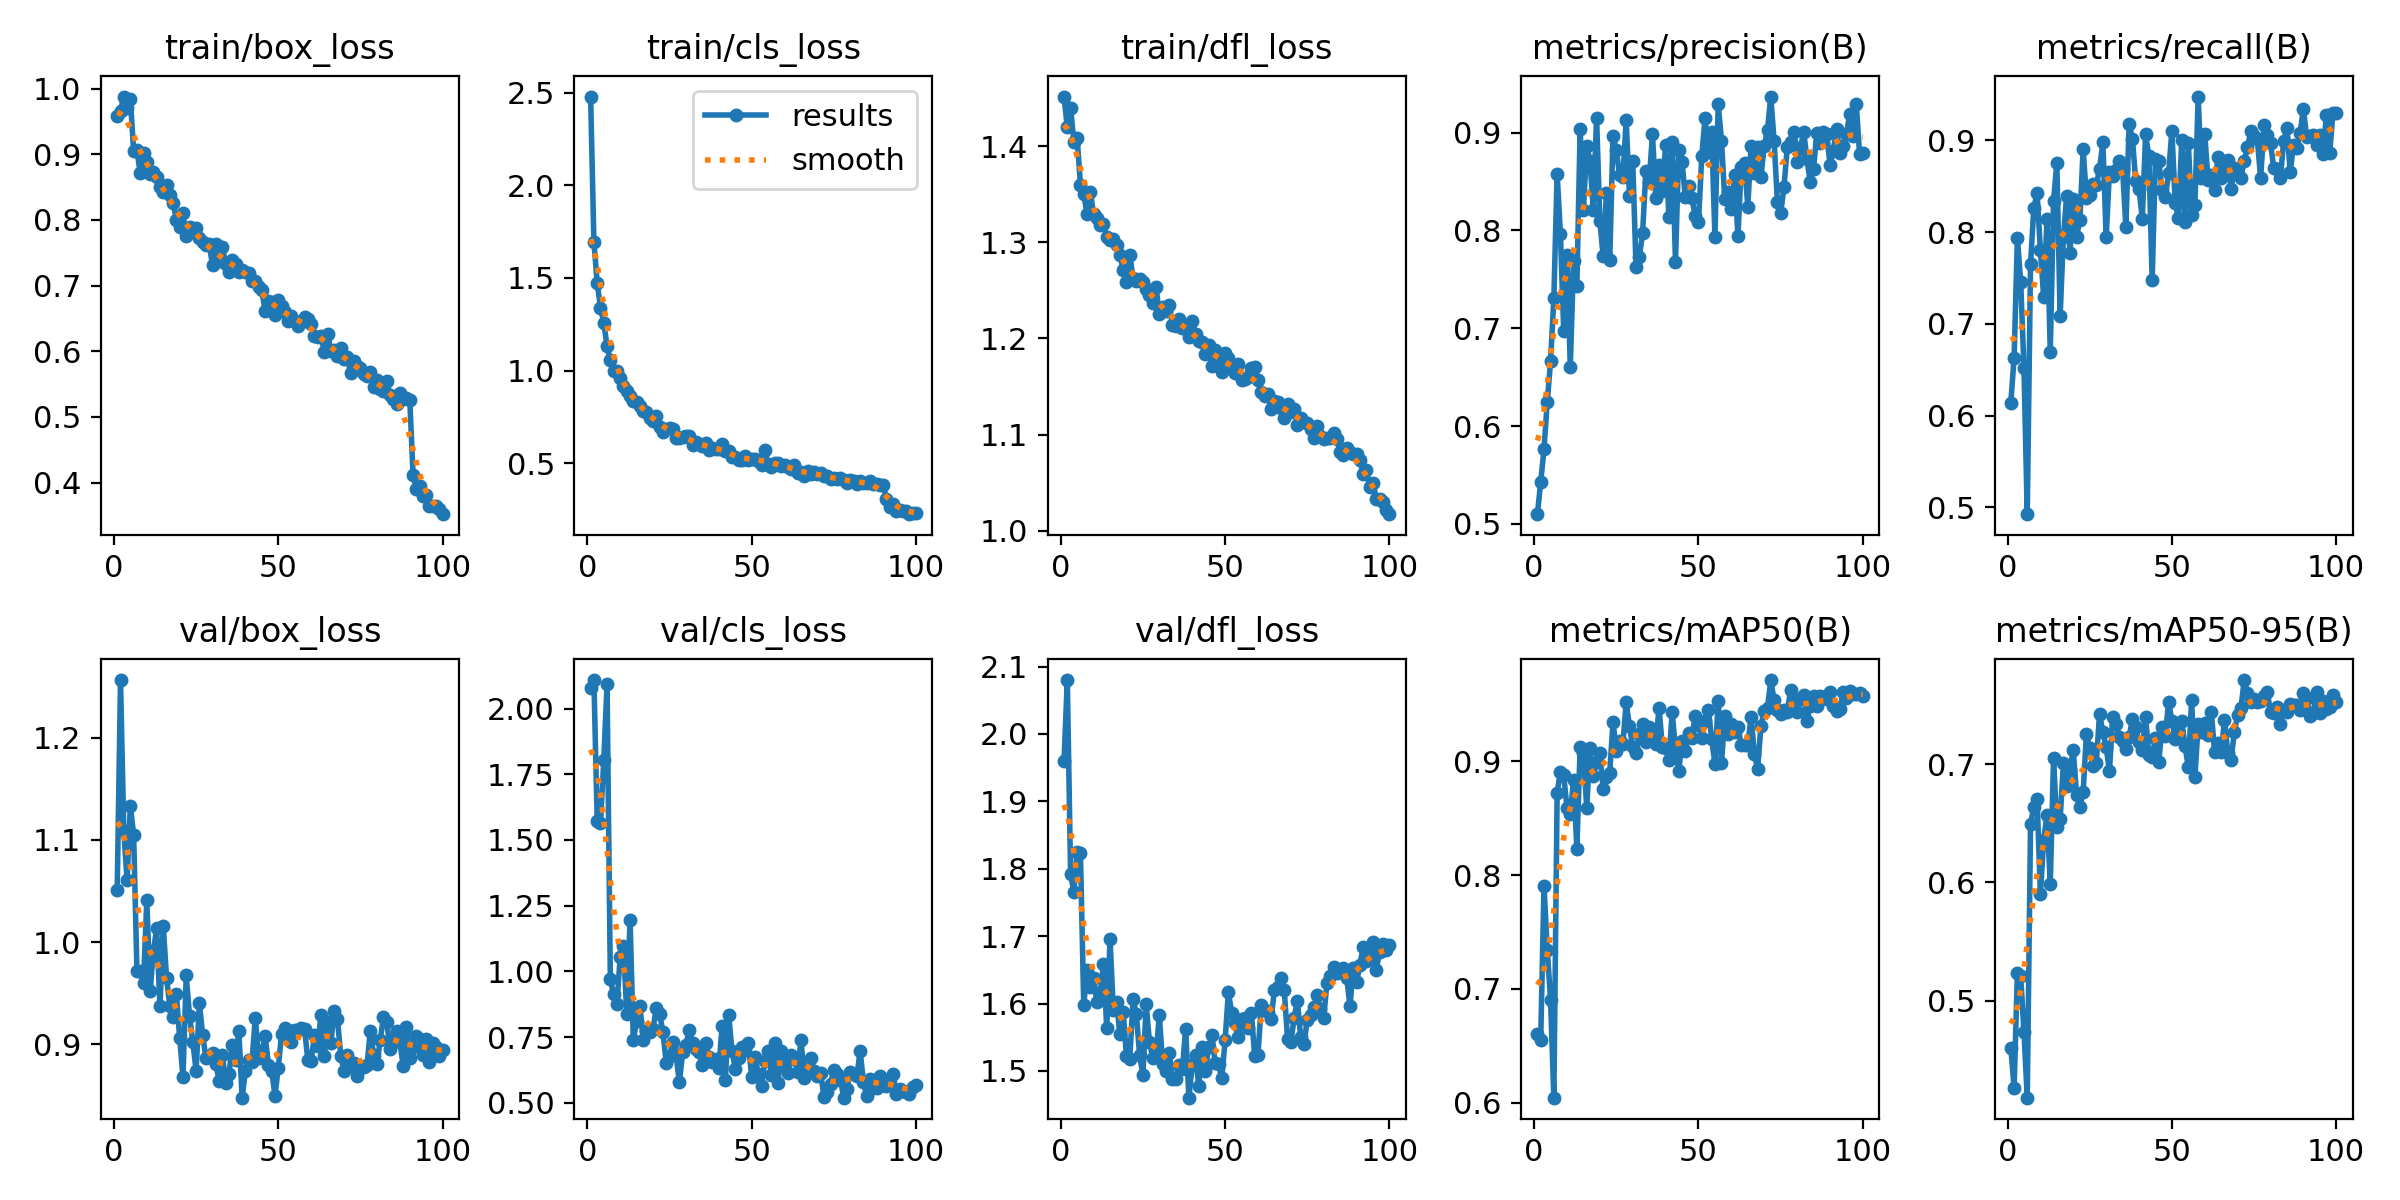

In [8]:
display(Image('runs/detect/train1/results.png'))

In [9]:
def evaluate_model_metrics(trainedmodel, data_path, dataset='val'):
    metrics = trainedmodel.val(data=data_path, split=dataset)

    precision = metrics.box.p.mean()
    recall = metrics.box.r.mean()
    map50 = metrics.box.map50
    map50_95 = metrics.box.map

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"mAP@50: {map50:.4f}")
    print(f"mAP@50-95: {map50_95:.4f}")

    return metrics, map50, map50_95, precision, recall

In [11]:
train_metrics, train_map50, train_map50_95, train_precision, train_recall = evaluate_model_metrics(model, "Apple-Disease-Detection-7\data.yaml")

Ultralytics 8.3.50  Python-3.11.0 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)


val: Scanning D:\Sem7\CV\UAS CV\Apple-Disease-Detection-7\valid\labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.61s/it]


                   all         60         72      0.936      0.878      0.971      0.771
                BLOTCH         16         17       0.83      0.882      0.953      0.859
               HEALTHY         11         20      0.992       0.85      0.982      0.705
                   ROT         16         16      0.931      0.938      0.979      0.776
                  SCAB         17         19      0.993      0.842      0.971      0.742
Speed: 0.8ms preprocess, 3.2ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs\detect\train12
Precision: 0.9365
Recall: 0.8780
mAP@50: 0.9710
mAP@50-95: 0.7707



image 1/1 d:\Sem7\CV\UAS CV\download-s.jpeg: 480x640 1 SCAB, 50.2ms
Speed: 3.0ms preprocess, 50.2ms inference, 3.2ms postprocess per image at shape (1, 3, 480, 640)


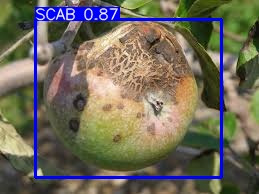

In [10]:
image_path = "download-s.jpeg"

results = model.predict(source=image_path, save=False)
image = cv2.imread(image_path)

for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0]) 
    conf = box.conf[0]  
    cls = int(box.cls[0])  
    label = f"{results[0].names[cls]} {conf:.2f}"  

    box_color = (255, 0, 0,0)  
    text_color = (255, 255, 255)  

    cv2.rectangle(image, (x1, y1), (x2, y2), box_color, 2)

   
    font_scale = 0.5 
    font_thickness = 1  
    padding = 0  
    (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)

    label_background_top_left = (max(x1, 0), max(y1 - text_height - 2 * padding, 0))
    label_background_bottom_right = (min(x1 + text_width + 2 * padding, image.shape[1]), y1)

    cv2.rectangle(image, label_background_top_left, label_background_bottom_right, box_color, -1)

    text_position = (label_background_top_left[0] + padding, label_background_top_left[1] + text_height + padding // 2)
    cv2.putText(image, label, text_position, cv2.FONT_HERSHEY_SIMPLEX, font_scale, text_color, font_thickness, cv2.LINE_AA)

file_name = os.path.basename(image_path)
output_path = f"runs/detect/train3/{file_name}"
os.makedirs(os.path.dirname(output_path), exist_ok=True) 
cv2.imwrite(output_path, image)

display(Image(output_path, width=600))
